# Assignment \#8 : The Astrophysical Distance Ladder

Kaimi Kahihikolo

Due: 17 April 2019

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import astropy.constants as const
import astropy.units as u

plt.style.use('seaborn-notebook')

___
## Comparing Clusters

In [2]:
Pleiades_df = pd.read_csv("aux/cluple.dat", header=2, 
                          sep='\s+')

NGC_6087_df = pd.read_csv("aux/clu6087.dat", header=2, 
                  sep='\s+')

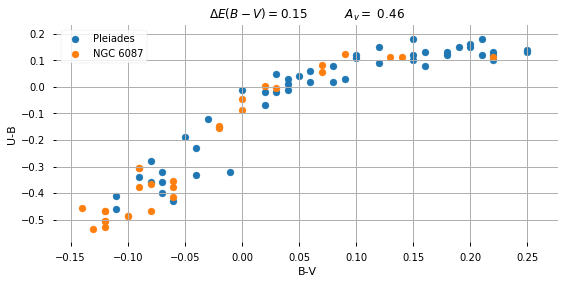

In [3]:
fig = plt.figure(figsize=(9, 4))
ax = plt.gca()
plt.grid()
plt.box(False)

ax.scatter(Pleiades_df['B-V'], Pleiades_df['U-B'], label='Pleiades')

dE_BV = 0.15

dE_UB = 0.84 * dE_BV  
NGC_BV = NGC_6087_df['B-V'] - dE_BV
NGC_UB = NGC_6087_df['U-B'] - dE_UB
Av = 3.1*dE_BV 

ax.scatter(NGC_BV, NGC_UB, label='NGC 6087')

ax.set_xlabel(r"B-V")
ax.set_ylabel(r"U-B")
ax.set_title(f"$\Delta E (B-V) = ${dE_BV} \t $A_v =$ {(Av):.2f}")

plt.legend(loc='best')
plt.savefig('out/c-c_compare.png', dpi=300, bbox_inches='tight')

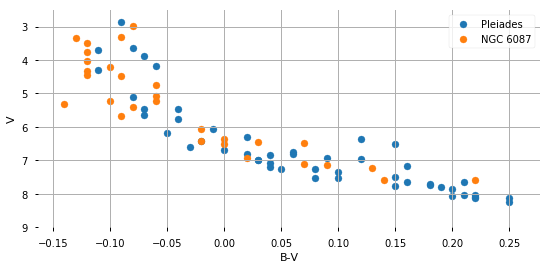

In [4]:
fig = plt.figure(figsize=(9, 4))
ax = plt.gca()
plt.box(False)
plt.grid()

m_M = 4.5
ax.scatter(Pleiades_df['B-V'], Pleiades_df['V'], label='Pleiades')
ax.scatter(NGC_6087_df['B-V'] - dE_BV, NGC_6087_df['V'] - Av - m_M, label='NGC 6087')

ax.set_xlabel(r"B-V")
ax.set_ylabel(r"V")
ax.set_ylim(9, 2.5)

plt.legend(loc='best')
plt.savefig('out/c-v_compare.png', dpi=300, bbox_inches='tight')

## Large Magellanic Cloud

In [5]:
gal_ceph_df = pd.read_csv("aux/cepgal.dat", header=1, 
                          sep='\s+')
gal_ceph_df['P(days)'] = gal_ceph_df['P(days)'].apply(np.log10)

lmc_ceph = pd.read_csv("aux/plr.dat", header=1, 
                          sep='\s+')

lmc_ceph_short = pd.read_csv("aux/spc.dat", header=1, 
                          sep='\s+')

lmc_ceph_short.head()

S_normae = {'Period' : np.log10(9.75), 'V' : -4.03}

In [6]:
E_BV_LMC = 0.12
AV_LMC = 3.1*E_BV_LMC
m_M_LMC = 18.43

lmc_ceph['V'] = lmc_ceph['V'] - AV_LMC - m_M_LMC
lmc_ceph_short['V'] = lmc_ceph_short['V'] - AV_LMC - m_M_LMC

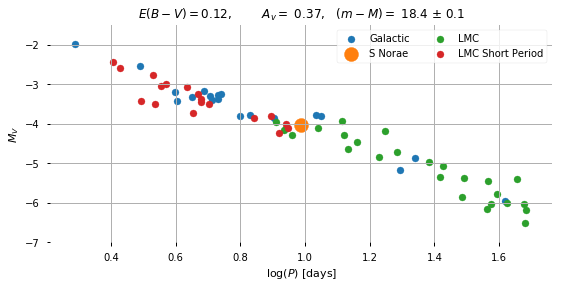

In [7]:
fig = plt.figure(figsize=(9, 4))
ax = plt.gca()
plt.box(False)
plt.grid()

ax.scatter(gal_ceph_df['P(days)'], gal_ceph_df['Mv'], label='Galactic')
ax.scatter(S_normae['Period'], S_normae['V'], label='S Norae', s=200)
ax.scatter(lmc_ceph['logP(days)'], lmc_ceph['V'], label='LMC')
ax.scatter(lmc_ceph_short['logP(days)'], lmc_ceph_short['V'], label='LMC Short Period')

ax.set_xlabel(r"$\log(P)$ [days]")
ax.set_ylabel(r"$M_V$")
ax.set_ylim(-7, -1.5)
ax.set_title(f"$E (B-V) = ${E_BV_LMC}, \t $A_v =$ {(AV_LMC):.2f}, \t $(m-M) =$ {(m_M_LMC):.1f} $\pm$ 0.1")

plt.legend(loc='best', ncol=2)
plt.savefig('out/LMC.png', dpi=300, bbox_inches='tight')

## Fornax Cluster & NGC 1365

In [8]:
import glob
from astropy.stats import LombScargle

cephs = glob.glob('aux/cepv*.dat')
ceph_period = pd.DataFrame([i[4:-4] for i in cephs], columns=['Filename'])
ceph_period['P(days)'] = np.ones(len(cephs))
ceph_period['avV'] = np.ones(len(cephs))
ceph_period['avI'] = [25.45, 24.84, 24.72, 25.17, 25.03, 25.09, 25.01, 25.13, 25.03, 24.71]
ceph_period

,Filename,P(days),avV,avI
0,cepv13,1.0,1.0,25.45
1,cepv16,1.0,1.0,24.84
2,cepv17,1.0,1.0,24.72
3,cepv19,1.0,1.0,25.17
4,cepv20,1.0,1.0,25.03
5,cepv22,1.0,1.0,25.09
6,cepv25,1.0,1.0,25.01
7,cepv31,1.0,1.0,25.13
8,cepv5,1.0,1.0,25.03
9,cepv7,1.0,1.0,24.71


/home/kaimibk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


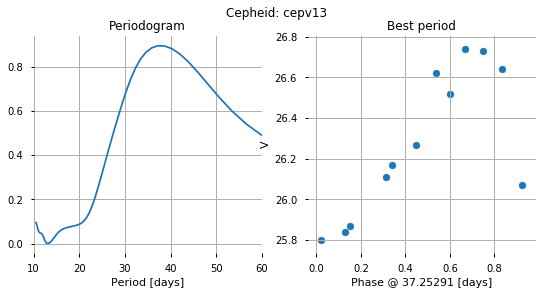

<Figure size 432x288 with 0 Axes>

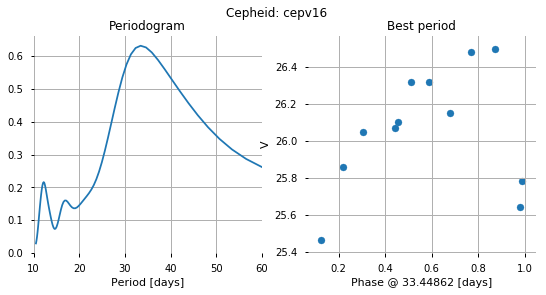

<Figure size 432x288 with 0 Axes>

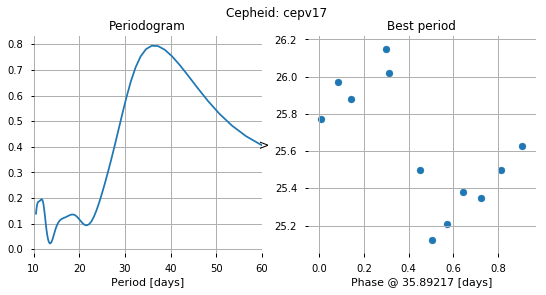

<Figure size 432x288 with 0 Axes>

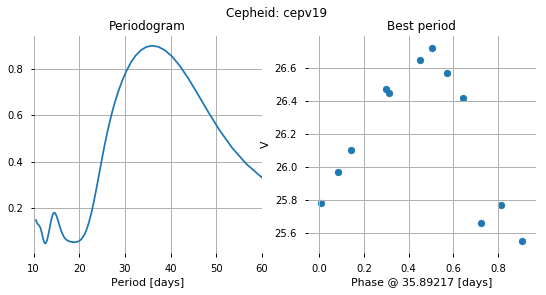

<Figure size 432x288 with 0 Axes>

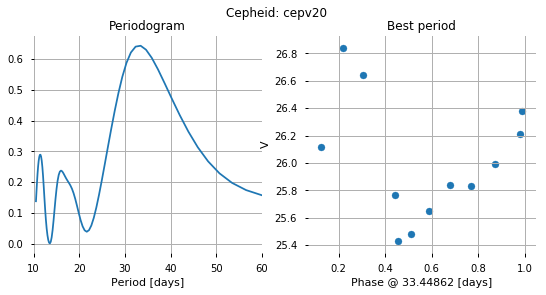

<Figure size 432x288 with 0 Axes>

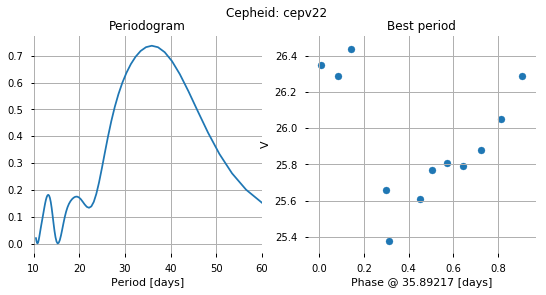

<Figure size 432x288 with 0 Axes>

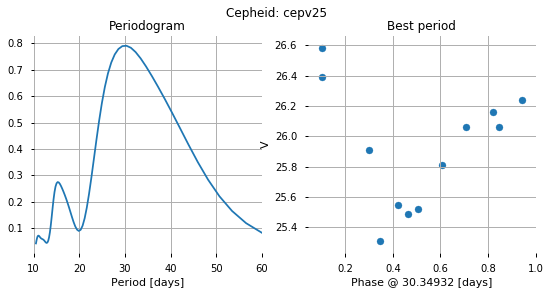

<Figure size 432x288 with 0 Axes>

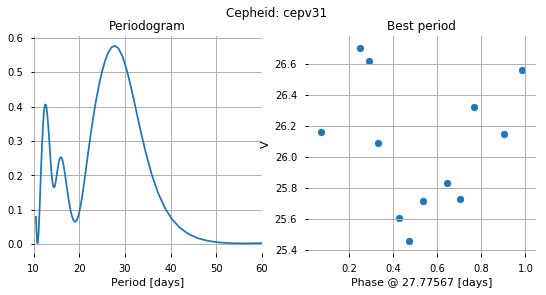

<Figure size 432x288 with 0 Axes>

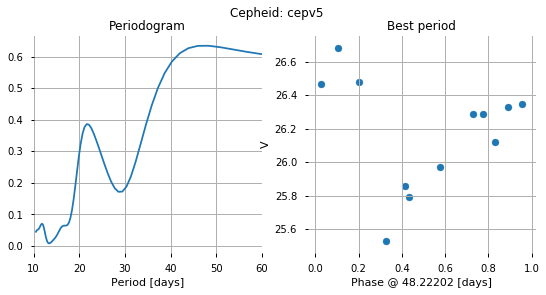

<Figure size 432x288 with 0 Axes>

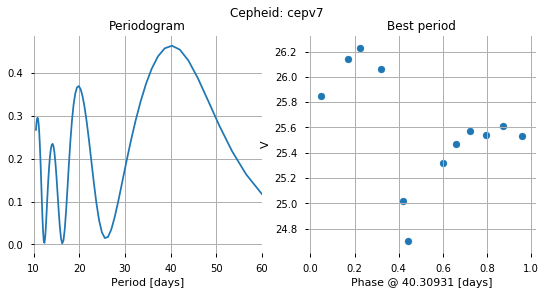

<Figure size 432x288 with 0 Axes>

In [9]:
for bid, ceph in enumerate(cephs):
    
    _df = pd.read_csv(ceph, skiprows=2, sep='\s+')
    X, Y = _df.values[:, 0], _df.values[:, 1]
    frequency, power = LombScargle(X, Y).autopower(minimum_frequency=1./60., maximum_frequency=1/10.5, samples_per_peak=20)
    
    period = 1.0 / frequency
    best_period = period[np.argmax(power)]
    phase = np.mod(X, best_period)/best_period
    idx = np.argsort(phase)
    
    ceph_period['P(days)'].iloc[bid] = best_period.round(1)
    ceph_period['avV'].iloc[bid] = Y.mean().round(2)
    ##ceph_period['avV_ph'].iloc[bid] = -2.5*np.log10((0.5*(phase[1]-phase[0])*10**(-0.4*Y)).sum())
    
    fig, ax = plt.subplots(1, 2, figsize=(9,4))
    ax[0].grid()
    ax[0].set_frame_on(False)
    ax[0].plot(1/frequency, power)
    
    ax[1].grid()
    ax[1].set_frame_on(False)
    ax[1].scatter(phase[idx], Y[idx])
    
    ax[0].set_xlabel('Period [days]')
    ax[0].set_xlim(10, 60)
    ax[0].set_title('Periodogram')
    ax[1].set_title('Best period')
    ax[1].set_xlabel('Phase @ %0.5f [days]' %(best_period))
    ax[1].set_ylabel(r'V')
    
    fig.suptitle(f'Cepheid: {ceph[4:-4]}')
    plt.pause(0.0001)
    plt.tight_layout()
    plt.savefig(f'out/{ceph[4:-4]}.png', dpi=300, bbox_inches='tight')

In [10]:
ceph_period

,Filename,P(days),avV,avI
0,cepv13,37.3,26.28,25.45
1,cepv16,33.4,26.06,24.84
2,cepv17,35.9,25.62,24.72
3,cepv19,35.9,26.18,25.17
4,cepv20,33.4,26.01,25.03
5,cepv22,35.9,25.94,25.09
6,cepv25,30.3,25.92,25.01
7,cepv31,27.8,26.08,25.13
8,cepv5,48.2,26.18,25.03
9,cepv7,40.3,25.59,24.71


https://iopscience.iop.org/article/10.1086/307002

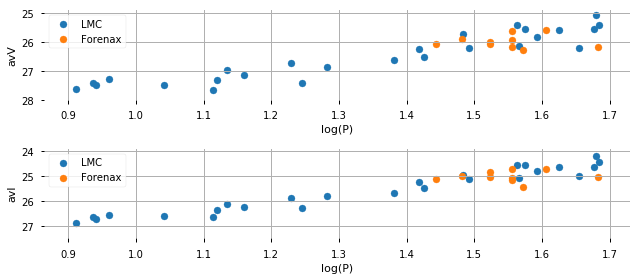

In [11]:
fig, ax = plt.subplots(2, figsize=(9,4))

lmc_ceph = pd.read_csv("aux/plr.dat", header=1, 
                          sep='\s+')


dmagV = 12.789473
dmagI = 12.795918

magvL=lmc_ceph['V']+dmagV
magiL=(lmc_ceph['V'] - lmc_ceph['V-I'])+dmagI

ax[0].scatter(lmc_ceph['logP(days)'], magvL, label='LMC')
ax[1].scatter(lmc_ceph['logP(days)'], magiL, label='LMC')


ax[0].set_frame_on(False)
ax[0].grid()
ax[0].scatter(np.log10(ceph_period['P(days)']), ceph_period['avV'], label='Forenax')
ax[0].set_xlabel('log(P)')
ax[0].set_ylabel('avV')
ax[0].set_ylim(28, 24.9)

ax[1].set_frame_on(False)
ax[1].grid()
ax[1].scatter(np.log10(ceph_period['P(days)']), ceph_period['avI'], label='Forenax')
ax[1].set_xlabel('log(P)')
ax[1].set_ylabel('avI')
ax[1].set_ylim(27.5, 23.9)

ax[0].legend(loc='best')
ax[1].legend(loc='best')
plt.tight_layout()
plt.savefig('out/forenax_v_i.png', dpi=300, bbox_inches='tight')

## Hubble

In [12]:
from astropy import uncertainty as unc
mult = unc.normal(5.7, std=0.5, n_samples=10000)
d = mult * unc.normal(17.4*u.Mpc, std=0.6*u.Mpc, n_samples=10000)
v = unc.normal(7185 *u.km/u.s, std=60*u.km/u.s, n_samples=10000)

H0 = v / d

In [13]:
(1/H0).pdf_mean.to(u.Gyr)

<Quantity 13.49784052 Gyr>

In [14]:
(1/H0).pdf_std.to(u.Gyr)

<Quantity 1.27180175 Gyr>